# Projeto 2 - Predição 

### Nomes:
Leandra Ferreira Fontes
<br>Tainá Pereira de Bonfim <br>

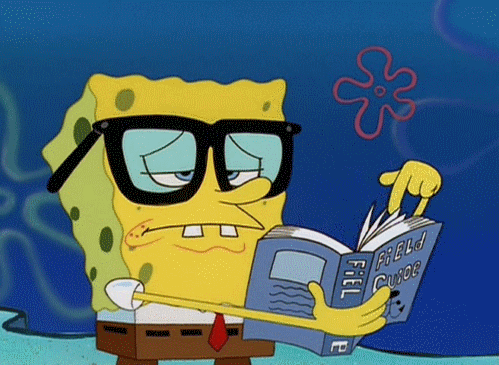

## Parte A - Introdução 


#### carregando as bibliotecas necessárias 

In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
from sklearn import tree
import statsmodels.api as sm

import sklearn 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error


#importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
#instantiating MultiLabelBinarizer
mlb = MultiLabelBinarizer()

#### verificando o repositório 

In [60]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')



Esperamos trabalhar no diretório: 
C:\Users\taina\OneDrive\Área de Trabalho\socorro\22-1b-cd-p2-leandra_taina-2



#### carregando a base de Dados

In [61]:
dados = pd.read_csv('dados.csv')
dados=dados.dropna()  #retirando as linhas sem informações 
#dados.isnull().sum()
print("O tamanho da base de dados é de ", len(dados))

O tamanho da base de dados é de  10642


### Objetivo
<b>Buscamos compreender como fatores externos como autor, número de páginas de um livro, dentre outros, podem influenciar no abandono ou não de um livro</b>,onde esse abandono está representado por uma variável quantitativa , que indica quantas pessoas abandoram aquele livro, segundo a nossa base de dados. Para isso, utilizamos, inicialmente, as seguintes features listadas abaixo:

<ul> <li> ano: Ano em que o livro foi publicado </li> 
<li> paginas: Número de páginas do livro </li> 
<li>  rating: Média das avaliações </li>
<li>avaliacao: Quantidade de avaliações</li> 
<li>resenha: Quantidade de resenhas no skoob</li>
<li> <b> abandonos: Quantidade de pessoas que abandonaram a leitura (Nossa target)</b> </li>
<li>relendo: Quantidade de pessoas que estão relendo esse livro</li>
<li>querem_ler: Quantidade de pessoas que querem ler esse livro</li>
<li>lendo: Quantidade de pessoas que estão lendo esse livro</li>
<li>leram: Quantidade de pessoas que leram esse livro</li>
<li>male: Porcentagem de leitores do sexo masculinos</li>
<li>editora: Editora que publicou o livro</li>
<li>autor: Autor que publicou o livro</li>    
<li>female: Porcentagem de leitoras do sexo feminino</li></ul>


#### Base de dados utilizada:
Acesse o link abaixo: 

https://www.kaggle.com/datasets/victorstein/livros-skoob 

#### Conhecendo o nosso Data Frame 
Aqui expomos o data Frame para explorar seus dados a respeito de cada feature e analisar se havia dados a serem excluídos, ou seja, dados que inteferissem, negativamente, no nosso modelo. A exemplo, dados como 0 para o ano, pois não existe ano 0, foram excluídos logo em seguida. 

In [62]:
dados.head()


,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


Aqui utilizamos o 'describe' para analisar dados mais gerais da tabela como máximo, mínimo, média, quantidade de linhas, dentre outros.

In [63]:
dados.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,9.785962e+12,2009.246664,280.068408,3.859500,122.017196,50.500094,37.996053,10.640387,152.303890,53.538433,129.113043,26.246476,73.177786
std,1.461899e+11,58.905509,165.168242,0.708709,205.440090,125.526660,118.393596,60.553771,234.507585,129.305753,208.438098,19.427422,20.116669
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,176.000000,3.600000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,10.000000,61.000000
50%,9.788551e+12,2012.000000,260.000000,4.000000,26.000000,5.000000,3.000000,0.000000,35.000000,8.000000,31.000000,23.000000,76.000000
75%,9.788579e+12,2016.000000,352.000000,4.200000,130.000000,33.000000,16.000000,2.000000,195.000000,38.000000,146.000000,38.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


## Análise exploratória 
Aqui começaremos a analisar nosso conjunto de dados e entender suas principais características, usando métodos de visualização como tabela cruzada,gráficos de dipersão ,histogramas ,matriz de confusão ,dentre outros. 



### Features não consideradas :
<ul> <li>   
    titulo:Título de publicação do livro </li>

Justificativa:
<br> Tomamos como hipótese que ,como queremos fazer uma projeção futura, esse feature não seria de bom uso, já que não daria para prever um título futuro, dado nossa base de dados. <br>

<li> Código do livro ISBN_10 e ISBN_13 </li>

Justificativa:
<br> Tomamos como hipótese que,devido os números grandes terem se repetido inúmeras vezes, isso não seria bom para a previão, além de ter mostrado uma baixa correlação na matriz de confusão. <br>
 </li>
<li> idioma: Idioma de publicação </li>

Justificativa: 
<br>A maioria dos dados possui o português como idioma, o que, hipoteticamente, poderia gerar uma previsão errada dos dados.<br>  </ul>

### Deletando dados:
Aqui deletamos as colunas relacionadas as nossas hipóteses das features não consideradas e verificamos a correspondência no Data Frame

In [64]:
#Deletando a coluna Título do Data Frame e verificando a correspondência do dataFrame

dados=dados.drop(['titulo','ISBN_13','ISBN_10'], axis=1)
dados.head(1)

,autor,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


Aqui mostramos a porcentagem do idioma português (idioma de publicação do livro), no nosso data frame e que, por ser muito repetitivo, o excluímos, tomando como hipótese a chance de dar algum erro futuro na predição do modelo. 

In [65]:
valor=dados.idioma.value_counts(normalize=True)
print(valor)

print("Como é possível se observar, o Português está presente em 99% do dataFrame !")

português    0.988912
inglês       0.007048
espanhol     0.003759
holandês     0.000094
italiano     0.000094
francês      0.000094
Name: idioma, dtype: float64
Como é possível se observar, o Português está presente em 99% do dataFrame !


### Deletando mais dados:
De acordo com a hipótese que assumimos acima, depois de provar a frequência do idioma português no data frame, excluímos essa coluna pelo código abaixo. 

In [66]:
dados=dados.drop(['idioma'], axis=1)
dados.head(1)

,autor,ano,paginas,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Nath Finanças,2021,128,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72


### Matriz de confusão para fazer uma correlação entre as features quantitativas: 

Aqui utilizamos matriz de confusão para cruzar todos os features quantitativos com nossa target "Abandonos", também quantitativa, e analisar quais features seriam mais relevantes, ou seja, os que possuíram a maior correlação. Assim, podemos citar como exemplo a correlação entre abandonos e resenha, que é de 0.44, ou seja, uma correlação alta segundo essa matriz, mas sabemos que em relação ao coefieceinte de pearson, isso siginifica uma correlação fraca. Dessa forma, assumiremos como hipótese a de que, depois de alguns leitores acessarem as resenhas do livro que estavam lendo, esse número de abandonos ficou em torno de 44%. Uma outra hipótese que assumiremos é a de que, segundo a correlação número de páginas por abandono, o número de páginas praticamente em nada influencia no abandono ou não de um livro, sendo aqui representado por 0.089. Uma outra hipótese que assumiremos é a de que,  pouco importa o ano de publicação do livro em relação ao seu abandono, pois, como mostrado na matriz, ele só representa cerca de 0.014.Uma outra hipótese que assumiremos é a de que, a baixa porcentagem em relação as pessoas que estão relendo , cerca de 30%, pode ter influenciado no número de abandonos, mas esse número também representa uma correlação fraca.Uma outra hipótese que assumiremos é a de que, a relação entre as pessoas que querem ler por abandonos é desprezível segundo o coefieciente de pearson, e que, enquanto uma aumenta , a outra diminui, analogamente, "male" (porcentagem de leitores do sexo masculino), "leram" e "avaliacao". Logo, assumiremos que as features cruzadas com a target abandono que representaram de 0 a 0.3 de correlação, podem ser consideradas desprezíveis de acordo com coeficiente de correlação de pearson.

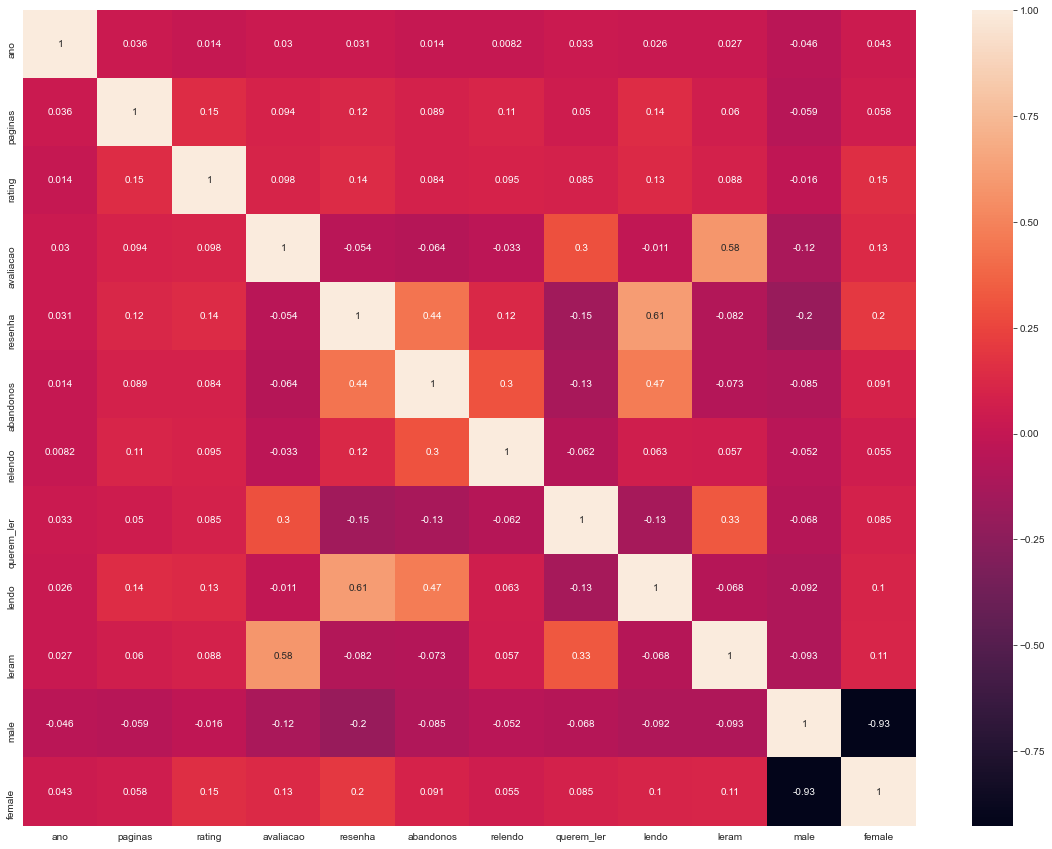

In [67]:
corr_df = dados.corr(method='pearson')

plt.figure(figsize=(20,15))
sns.heatmap(corr_df, annot=True)
plt.show()

### Definindo a qual distribuição a variável Targert pertence 

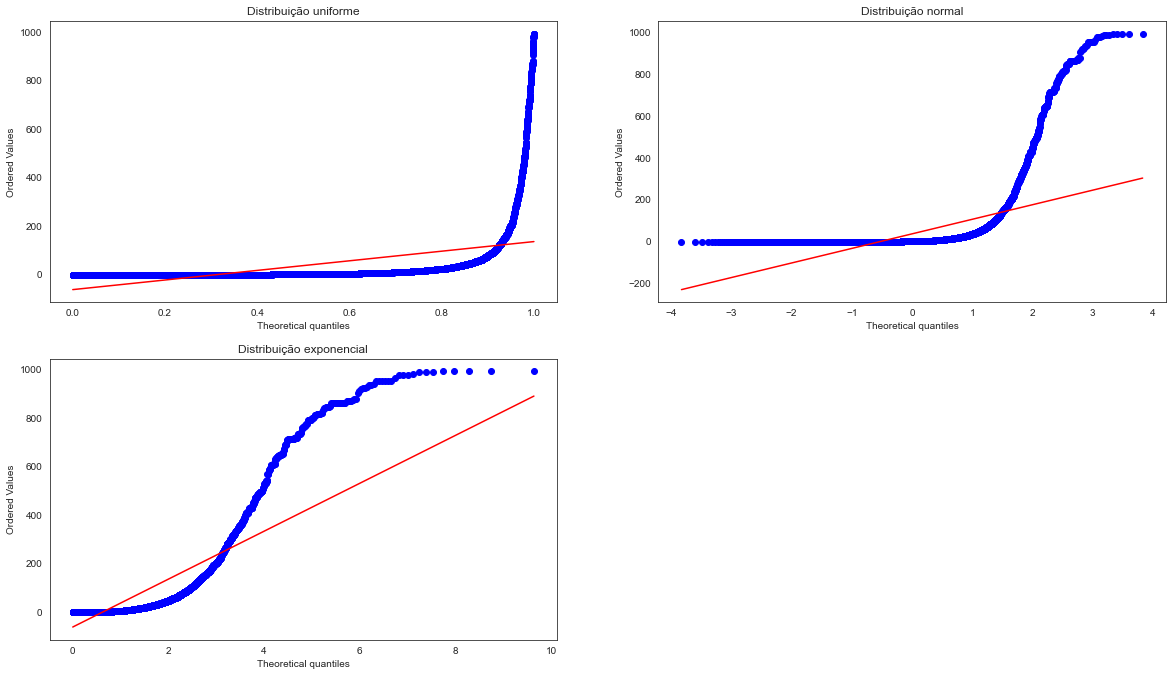

In [68]:
plt.figure(figsize=(20,30))
plt.subplot(521)

stats.probplot(dados.abandonos, dist = 'uniform', plot = plt);
plt.title('Distribuição uniforme')

plt.subplot(522)
stats.probplot(dados.abandonos, dist = 'norm', plot = plt);
plt.title('Distribuição normal')

plt.subplot(523)
stats.probplot(dados.abandonos, dist = 'expon', plot = plt);
plt.title('Distribuição exponencial')
plt.show()

**Como é possível de ser visualizado nos gráficos da distribuição normal, uniforme e exponencial acima, a nossa target não segue nenhum entre os modelo de distribuição propostos.**

### Gráficos de dispersão para cada uma das features 

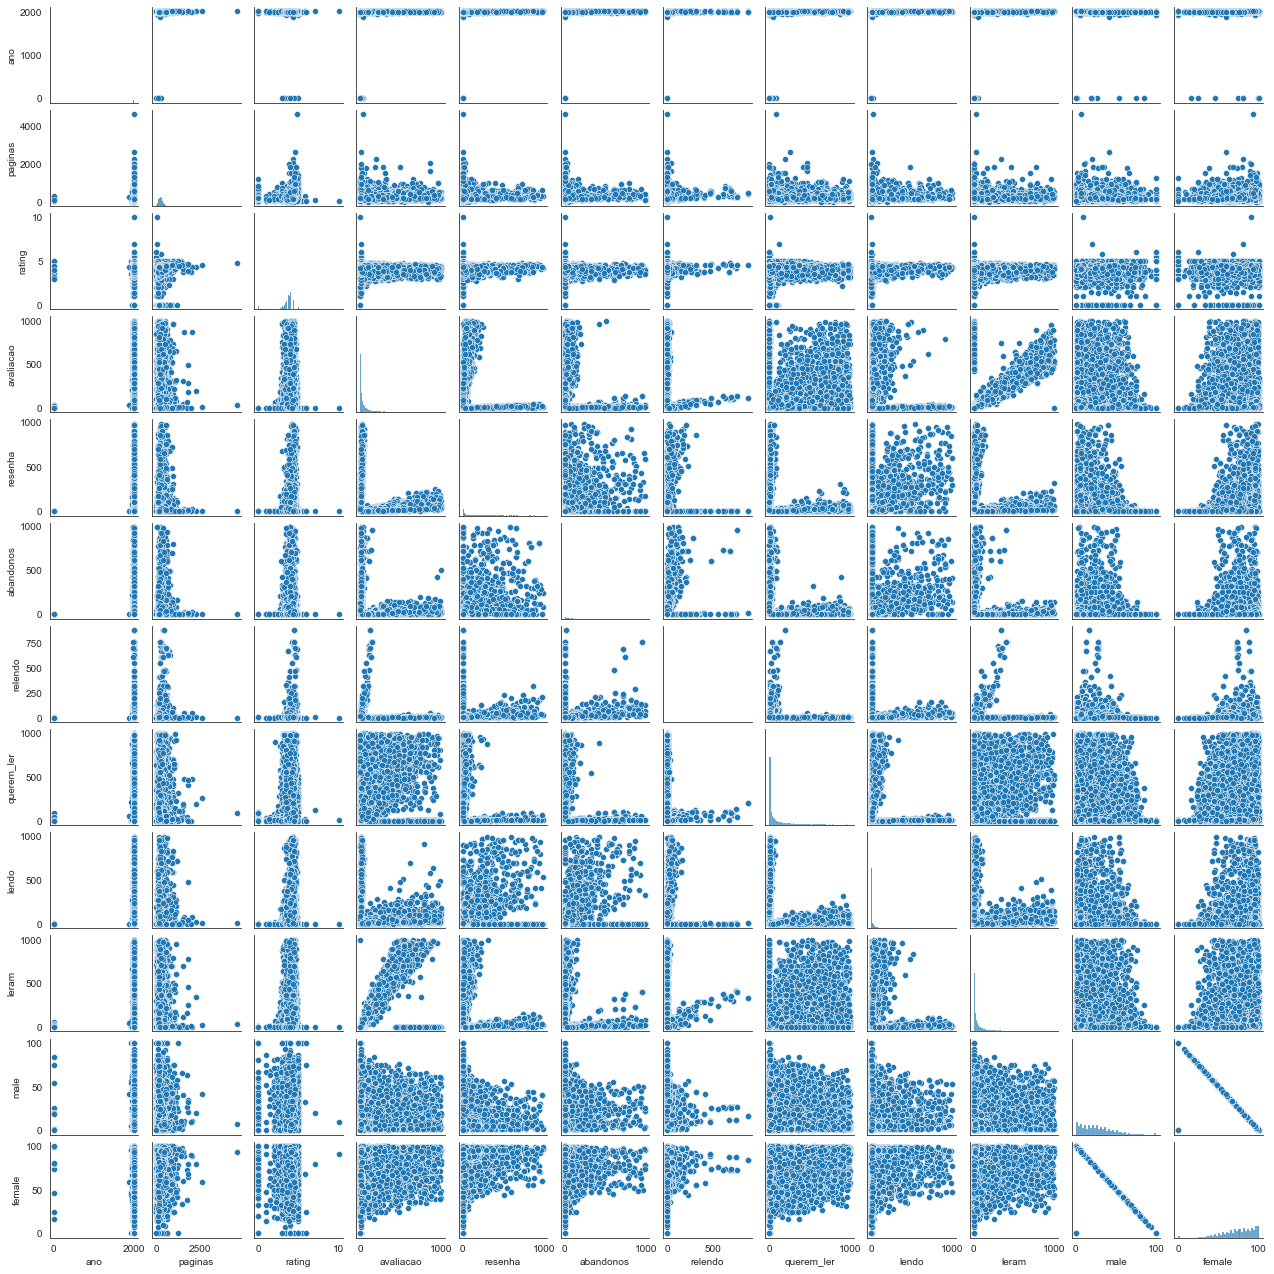

In [69]:
sns.pairplot(dados, height=1.5)

No gráfico acima foi plotado gráficos de dispersão para se obter uma melhor análise a respeito de cada feature quantitativa em relação a Target abandonos, e gerar possíveis hipóteses. 

## Parte B- Minerando Dados as Características do Dataset 

Aqui extraímos a coluna  anos do nosso data frame e colocamos dentro de uma lista para analisar que anos temos no data frame, a exemplo, temos gênero.

In [70]:
#verificando os anos pertercentes a coluna anos no dataFrame 
lista=[]
anos=dados.ano
for ano in anos: 
    if ano not in lista: 
        lista.append(ano)
print(lista)
# autor=dados.autor
# print(autor)


[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2009, 2014, 2013, 2012, 2011, 2010, 2008, 2007, 2006, 2005, 2004, 2003, 1969, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1988, 1938, 0, 1994, 1993, 1992, 1991, 1990, 1989, 1987, 1986, 1985, 1982, 1981, 1980, 1978, 1977, 1976, 1975, 1973, 1967, 1965, 1956, 1954, 1941, 1983, 1979, 1962, 1961, 1950, 1931, 1884, 1966]


Abaixo extraímos a coluna  "Gênero" do nosso data frame e colocamos dentro de uma lista para analisar quais gêneros de livros temos no data frame e sua quantidade.

In [71]:
lista=[]
for gen in dados.genero: 
    if gen not in lista: 
        lista.append(gen)
# print(lista)

In [72]:
dados.value_counts(normalize=True)
base=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)

genero
Autoajuda / Literatura Brasileira / Romance                                                                989.0
Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério     954.0
Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério     954.0
Contos / Ficção / Literatura Estrangeira / Aventura                                                        937.0
Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror         928.0
Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance                                    905.0
]Horror / Suspense e Mistério / Ficção / Literatura Estrangeira                                            880.0
Literatura Estrangeira / Ficção / Distopia / Infantojuvenil                                                877.0
 Artes / Literatura Estrangeira / Não-ficção                                             

* ### Variáveis Qualitativas- Tabelas cruzadas


Aqui extraímos a coluna  "autor" do nosso data frame e colocamos dentro de uma lista para analisar quais autores de livros temos no data frame e sua quantidade.

In [73]:
lista=[]
for a in dados.autor: 
    if a not in lista: 
        lista.append(a)
        
# print(lista)

In [74]:
data = dados.loc[dados['autor'] == 'Kate Elizabeth Russell','abandonos']
data

1    48
Name: abandonos, dtype: int64

In [75]:
dados.value_counts(normalize=True)
base=dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)


autor
Thomas Bulfinch        937.000000
Friedrich Nietzsche    905.000000
Almeida Garrett        608.000000
Nancy Jo Sales         589.000000
Timur Vermes           460.000000
Isabela Freitas        423.625000
Arthur Golden          420.000000
Alyson Noël            417.105263
Jonathan Swift         414.000000
Esther Earl            410.000000
Name: abandonos, dtype: float64

Aqui estamos analisando a quantidade de abandonos do livro pelos 10 autores que mais apareceram no data frame

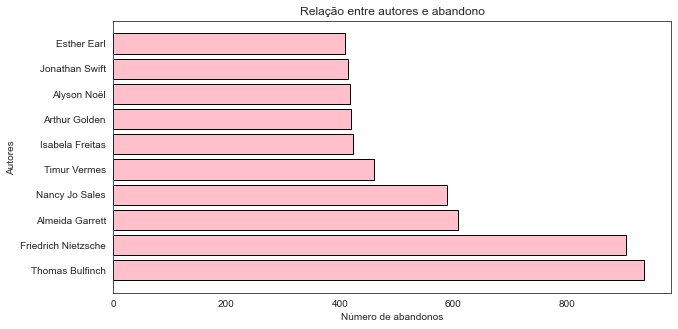

In [76]:
lista_names = ['Thomas Bulfinch', 'Friedrich Nietzsche','Almeida Garrett', 'Nancy Jo Sales', 'Timur Vermes', 'Isabela Freitas','Arthur Golden','Alyson Noël', 'Jonathan Swift', 'Esther Earl']
lista_valores= []
for i in base: 
    lista_valores.append(i)
    
plt.figure(figsize=(10, 5))

plt.barh(lista_names, lista_valores, color='pink', edgecolor='black')

plt.title("Relação entre autores e abandono")
plt.xlabel('Número de abandonos')
plt.ylabel("Autores")
plt.show()

Percebe-se pelo gráfico acima que o autor maior número de abandonados pertencem ao autor Thomas Bulfinch . Assim, sendo ele referência em assuntos mitológicos segundo o site <b> https://pt.wikipedia.org/wiki/Thomas_Bulfinch </b>, podemos assumir como hipótese que a juventude do século XXI não tem muito interesse por esses assuntos, o que fez com que o número de abandonos fosse auto.

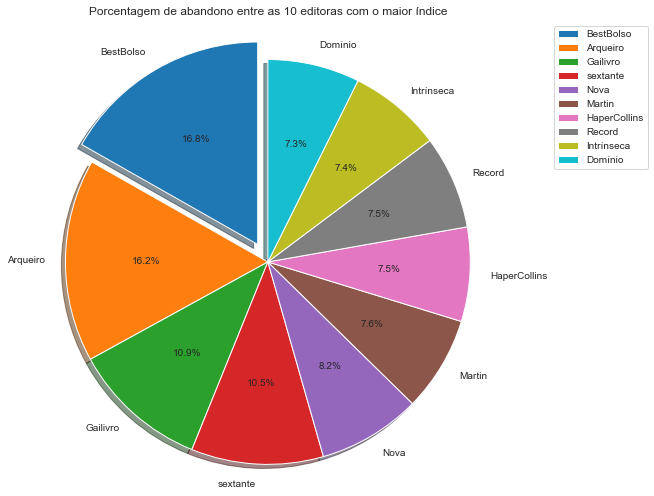

In [77]:
#crossTab é apenas para qualitativas

lista_editoras=['BestBolso', 'Arqueiro', 'Gailivro', 'sextante','Nova','Martin','HaperCollins','Record','Intrínseca','Domínio']
base2=dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)

lista_valores= []
for i in base: 
    lista_valores.append(i)


#criando gráfico de pizza 

explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(9, 7))
plt.title('Porcentagem de abandono entre as 10 editoras com o maior índice')
plt.pie(lista_valores, explode=explode, labels=lista_editoras, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(lista_editoras, bbox_to_anchor=(1.3,1), loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

Percebe-se pelo gráfico acima que as editoras com maior índice de abandonados são a BestBolso e Arqueiro. Assim, assumiremos como hipótese que elas não agradam muito o público leitor, seja pelo seu material, tradução ou escrita. 

In [78]:
dados['genero_colunas']=dados.genero.apply(str.split,args="/")
genre_mlb = mlb.fit_transform(dados['genero_colunas'])
genre_mlb
pd.DataFrame(mlb.fit_transform(dados['genero_colunas']),columns=mlb.classes_,index=dados.index)

,,\t,,,,,,Infantil,""" - Stephen Chbosky, autor de As Vantagens de Ser InvisívelLiteratura Estrangeira",""" Suspense e Mistério",...,"Humor, Comédia",Pode ser a chance de uni-los novamente?Contos,Ficção,´,"· Sim! É possível cozinhar bem com o micro-ondas· Truques e dicas de cozinha· Ervas e temperos que dão sabor e cor à comida· Saiba o prazo de validade dos alimentos· Descongele carnes, aves e peixes",» - Kirkus RewiewsRomance,»The TimesRomance,"À medida que os fios do destino se entrelaçam no explosivo final da série Trono de Vidro, todos devem lutar se quiserem uma chance de sobreviverFantasia","É vital que Jack e seus amigos encontrem o Tecelão - mas será que eles conseguirão cumprir essa tarefa, aparentemente simples, sem criar um enorme paradoxo temporal capaz de destuir a vida da forma como a conhecemos?Alias, que horas são?",⠀Ficção
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Acima tentamos gerar uma tabela com os dados de gênero do livro, porém o data sete não está muito bom. Assim, além dos gêneros, ele retornou textos descritivos que não deveriam fazer parte dessa coluna. A partir disso, iremos descartar a feature "genero" da nossa previsão para evitar possíveis problemas futuras. 

## Análise das features quantitativas:

C:\Users\taina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


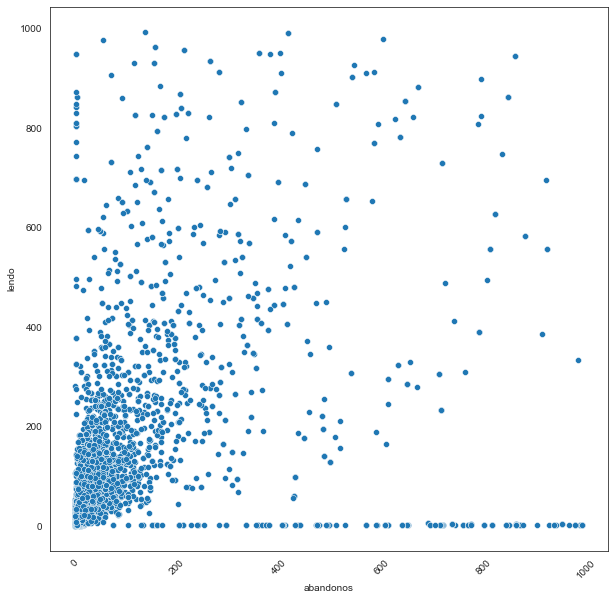

In [79]:
sns.set_style('white')

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.scatterplot(dados.abandonos, dados.lendo)
plt.show()

No gráfico de dispersão acima,consideramos, hipoteticamente, no início, que os livros que estavam sendo lidos estavam sendo abandonados na mesma proporção por não terem agradado ao público.

In [80]:
valor=dados['abandonos'].corr(dados['lendo'])
print('A correlação entre a target abandono com a feature lendo é de {}'.format(valor))

A correlação entre a target abandono com a feature lendo é de 0.4695600175356676


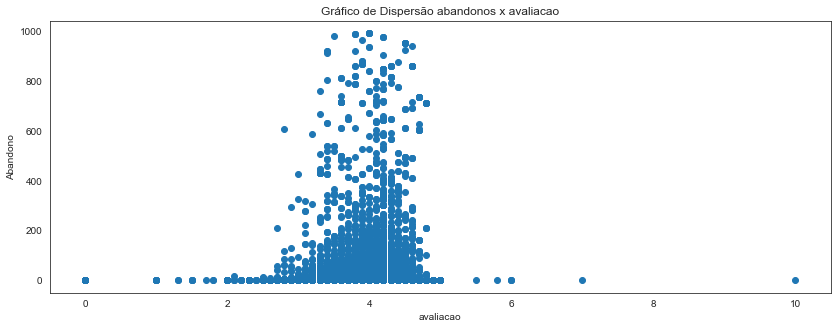

In [81]:
plt.figure(figsize=(14,5))
plt.scatter(dados['rating'],dados['abandonos'])
plt.title('Gráfico de Dispersão abandonos x avaliacao')
plt.xlabel('avaliacao')
plt.ylabel('Abandono')
plt.show()

Fazendo uma hipótese sobre o gráfico acima, podemos considerar que no início o índice de abandono foi baixo pois, o livro foi considerado ruim por algum motivo e, devido a isso, poucos usuários iniciaram sua leitura, já no meio, podemos considerar que índice de abandono foi alto pois, como estava na média, o índice de adesão foi alto, mas não agradou ao público e, no final , como ele foi bem avaliado, teve baixo abandono.

In [82]:
valor=dados['rating'].corr(dados['abandonos'])
print('A correlação entre a target abandono com a feature avaliacao é de {}'.format(valor))

A correlação entre a target abandono com a feature avaliacao é de 0.0836762497568402


Abaixo extraímos a coluna  "Resenha" do nosso data frame e colocamos dentro de uma lista para analisar quais resenhas de livros temos no data frame e sua quantidade.

In [83]:
lista=[]
for res in dados.resenha: 
    if res not in lista: 
        lista.append(res)
        
# print(lista)

### Gráficos de Histograma:
Para uma maior análise a respeito das features da base de dados, plotamos alguns histogramas.

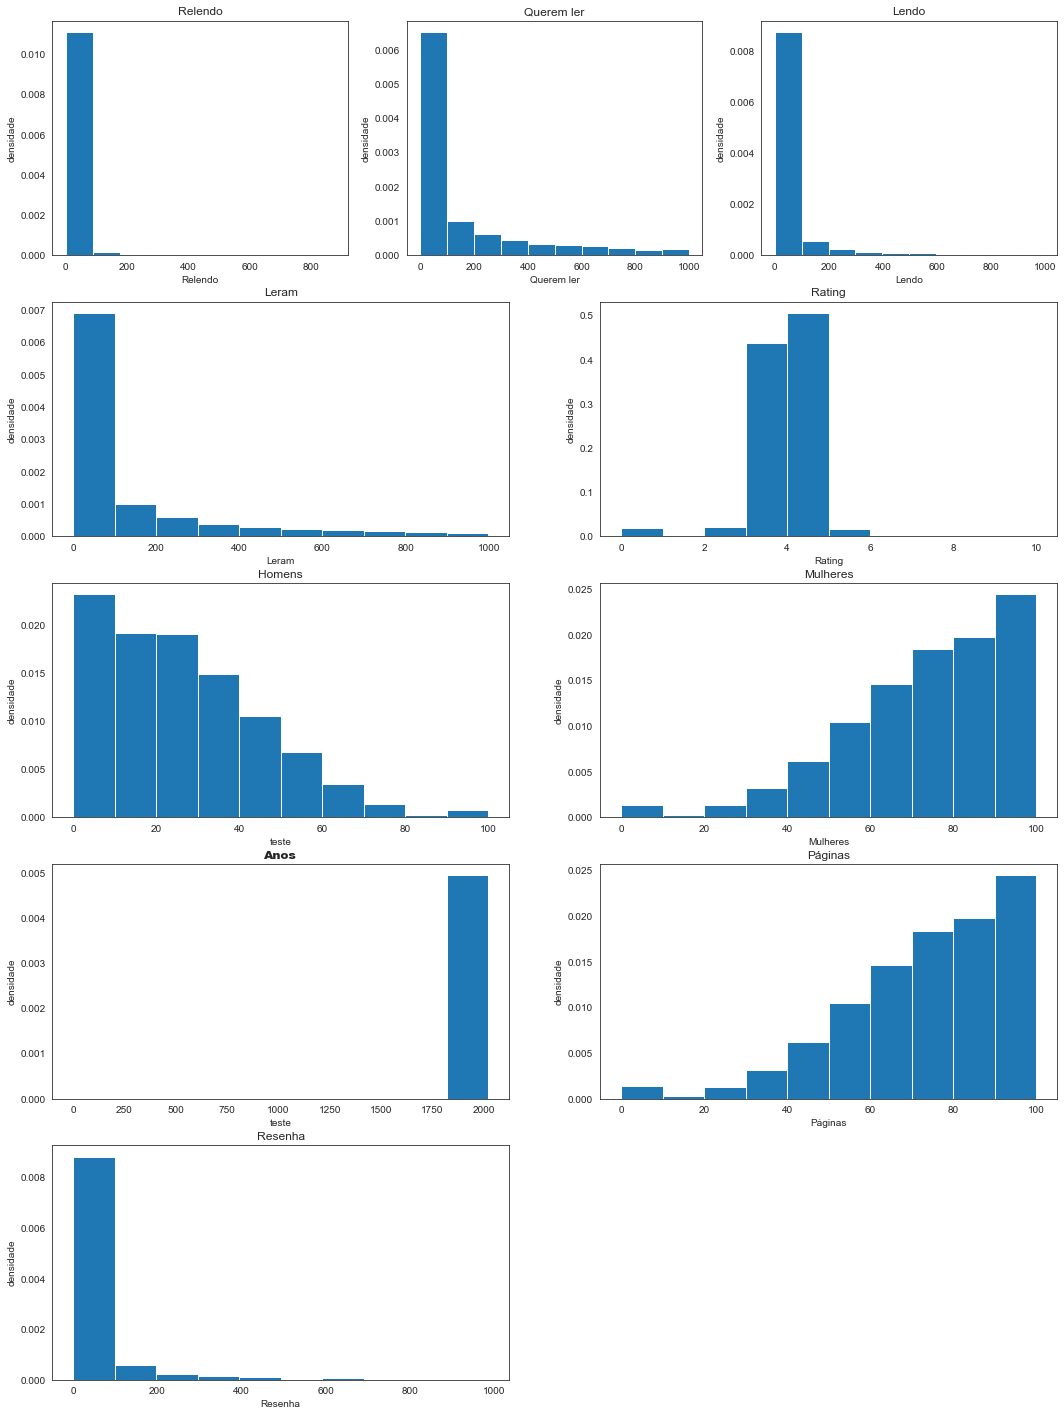

In [84]:
plt.figure(figsize=(18,25))
plt.subplot(521)
plt.hist(dados.avaliacao, density=True, edgecolor="white")
plt.title('avaliações', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('avaliações')

plt.subplot(522)
plt.hist(dados.abandonos, density=True, edgecolor="white")
plt.title('abandonos', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('abandonos')

plt.subplot(523)
plt.hist(dados.leram, density=True, edgecolor="white")
plt.title('Leram', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Leram')

plt.subplot(524)
plt.hist(dados.rating, density=True, edgecolor="white")
plt.title('Rating', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Rating')

plt.subplot(525)
plt.hist(dados.male, density=True, edgecolor="white")
plt.title('Homens', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(526)
plt.hist(dados.female, density=True, edgecolor="white")
plt.title('Mulheres', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Mulheres')

plt.subplot(527)
plt.hist(dados.ano, density=True, edgecolor="white")
plt.title('Anos', fontweight = 1000)
plt.ylabel('densidade')
plt.xlabel('teste')

plt.subplot(528)
plt.hist(dados.female, density=True, edgecolor="white")
plt.title('Páginas', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Páginas')

plt.subplot(529)
plt.hist(dados.resenha, density=True, edgecolor="white")
plt.title('Resenha', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Resenha')

plt.subplot(531)
plt.hist(dados.relendo, density=True, edgecolor="white")
plt.title('Relendo', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Relendo')

plt.subplot(532)
plt.hist(dados.querem_ler, density=True, edgecolor="white")
plt.title('Querem ler', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Querem ler')

plt.subplot(533)
plt.hist(dados.lendo, density=True, edgecolor="white")
plt.title('Lendo', fontweight = 400)
plt.ylabel('densidade')
plt.xlabel('Lendo')

plt.show()

A partir dos histogramas acima é possível observar:
<ul> <li> Relendo tem assimetria a direita</li>
    <li> Querem ler tem assimetria a direita</li>
    <li> Lendo tem assimetria a direita</li>
    <li> Leram tem assimetria a direita</li>
    <li> Rating foi inconclusivo</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Homens tem assimetria a direita</li>
    <li> Mulheres tem assimetria a esquerda</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Anos tem simetria</li>
    <li> Relendo tem assimetria a direita</li>
    <li> Páginas tem assimetria a esquerda</li>
    <li> Resenha tem assimetria a direita</li>
    
</ul>

## Regressão linear:

<ul> 
    <li> Segundo o site <b> https://www.ibm.com/br-pt/analytics/learn/linear-regression </b>, a regressão linear é um método que prever o valor de uma variável, como no nosso caso, a target "Abandonos", conhecida como variável dependente, tomando por base uma outra, sendo aqui, nossas features,conhecidas como variáveis independentes.Além disso, ela estima os coeficicentes da equação linear, por meio das features disponíveis no data frame que melhor preveem o valor da variável dependente. Para estimar o valor de X, variável dependente,de Y, variável independente, deve ser gerada uma linha reta que minimize as discrepâncias entre valores de saída previstos e valores reais. Assim, segundo o site <b> https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste </b> , a regressão linear calcula uma equação que minimiza a distância entre a linha ajustada e todos os pontos de dados. Para isso, é utilizado o R², que nada mais é que uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Sua definição é de que ele é a porcentagem da variação da variável resposta, que pode ser explicada por modelo linear. Logo,     
       
        R²=variação explicada / variação total
Onde o R pode está entre 0 e 100%, sendo o 0% a indicação de que o modelo não explica a variabilidade dos dados em volta da sua média e o 100%, que o modelo expica toda a vaiabilidade dos dados de resposta em volta da sua média.
       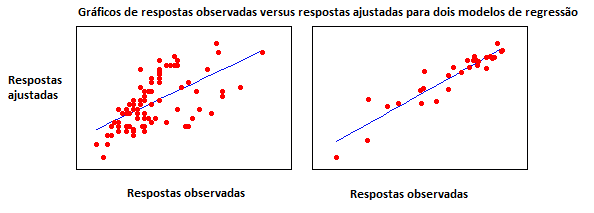</li> 
    </ul>

   

No modelo acima, podemos pereber que o modelo da direita é o que explica melhor a variância, pois seus pontos estão mais próximos da reta, diferentemente do modelo da esquerda. Além disso, quanto mais a variância for explicada pelo modelo de regressão, mais próximos os pontos estarão em relação a linha de regressão.


In [85]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

feature_columns=['rating', 'lendo','relendo','querem_ler','ano','paginas','male','female']
X=dados[feature_columns]
Y=dados.abandonos

x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)


- Modelo 1 - Regressão Linear pelo statsmodels.api

In [86]:
def regress(Y,X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results


results = regress(Y,X)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     566.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:23   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10633   BIC:                         1.281e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4036     35.252     -0.040      0.968     -70.504      67.697
rating        -0.1631      1.489     -0.110      0.913      -3.083       2.756
lendo          0.4047      0.008     52.656      0.000       0.390       0.420
relendo        0.5256      0.016     32.670      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.727      0.000      -0.036      -0.020
ano            0.0010      0.016      0.062      0.951      -0.031       0.033
paginas       -0.0015      0.006     -0.250      0.803      -0.013       0.010
male          -0.0057      0.140     -0.041      0.968      -0.280       0.268
female         0.2132      0.136      1.564      0.118      -0.054       0.480
==============================================================================
Omnibus:                     9955.463   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524145.635
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.204   Cond. No.                     7.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
print("Coefficient of determination (r²):0.299 sem as remoções ") 

Coefficient of determination (r²):0.299 sem as remoções 


In [88]:
feature_columns=['rating', 'lendo','relendo','querem_ler','ano','paginas','female']
X=dados[feature_columns]
Y=dados.abandonos
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     647.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:23   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10634   BIC:                         1.281e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8817     33.230     -0.057      0.955     -67.018      63.255
rating        -0.1835      1.402     -0.131      0.896      -2.932       2.565
lendo          0.4047      0.008     52.683      0.000       0.390       0.420
relendo        0.5257      0.016     32.683      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.727      0.000      -0.036      -0.020
ano            0.0010      0.016      0.063      0.950      -0.031       0.033
paginas       -0.0015      0.006     -0.248      0.804      -0.013       0.010
female         0.2184      0.049      4.478      0.000       0.123       0.314
==============================================================================
Omnibus:                     9955.487   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524158.554
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.205   Cond. No.                     7.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
feature_columns=['rating', 'lendo','relendo','querem_ler','paginas','female']
X=dados[feature_columns]
Y=dados.abandonos
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     755.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:23   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10635   BIC:                         1.281e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1636      6.091      0.027      0.979     -11.776      12.103
rating        -0.1837      1.402     -0.131      0.896      -2.932       2.565
lendo          0.4047      0.008     52.698      0.000       0.390       0.420
relendo        0.5257      0.016     32.686      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.729      0.000      -0.036      -0.020
paginas       -0.0015      0.006     -0.246      0.805      -0.013       0.010
female         0.2185      0.049      4.483      0.000       0.123       0.314
==============================================================================
Omnibus:                     9955.523   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524171.832
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.205   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
feature_columns=['lendo','relendo','querem_ler','paginas','female']
X=dados[feature_columns]
Y=dados.abandonos
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     907.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:23   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10636   BIC:                         1.281e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4480      3.912     -0.115      0.909      -8.116       7.220
lendo          0.4046      0.008     53.016      0.000       0.390       0.420
relendo        0.5255      0.016     32.773      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.768      0.000      -0.036      -0.020
paginas       -0.0016      0.006     -0.263      0.793      -0.013       0.010
female         0.2177      0.048      4.501      0.000       0.123       0.312
==============================================================================
Omnibus:                     9955.199   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524014.399
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.200   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
feature_columns=['lendo','relendo','querem_ler','paginas','female']
X=dados[feature_columns]
Y=dados.abandonos
results = regress(Y,X)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              abandonos   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     907.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:46:23   Log-Likelihood:                -64015.
No. Observations:               10642   AIC:                         1.280e+05
Df Residuals:                   10636   BIC:                         1.281e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4480      3.912     -0.115      0.909      -8.116       7.220
lendo          0.4046      0.008     53.016      0.000       0.390       0.420
relendo        0.5255      0.016     32.773      0.000       0.494       0.557
querem_ler    -0.0282      0.004     -6.768      0.000      -0.036      -0.020
paginas       -0.0016      0.006     -0.263      0.793      -0.013       0.010
female         0.2177      0.048      4.501      0.000       0.123       0.312
==============================================================================
Omnibus:                     9955.199   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           524014.399
Skew:                           4.459   Prob(JB):                         0.00
Kurtosis:                      36.200   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Modelo 2 - Regressão Linear pelo sklearn

In [92]:
regr = sklearn.linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)

r1=r2_score(y_test, y_pred)

print("\nOs coeficientes referentes a cada uma das features dispostas em relação a target é de: \n", regr.coef_)

print("\nMean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("\nCoefficient of determination (r²): %.2f" % r2_score(y_test, y_pred))


#RMSE- Raiz do erro quadrático médio
MSE = mean_squared_error(y_test,y_pred)


RMSE = mean_squared_error(y_test,y_pred,squared=False) # argumento 'squared' dado como false nos da o RMSE
RMSE = MSE**0.5
MAE = mean_absolute_error(y_test,y_pred)


print("\nErro Quadrático Médio", MSE)
print("\nErro Absoluto Médio: ",MAE)
print("\nRaiz do erro quadrático médio:",RMSE)


Os coeficientes referentes a cada uma das features dispostas em relação a target é de: 
 [-0.86926198  0.4203435   0.4849476  -0.02476429 -0.00356864 -0.00233435
  0.00983119  0.21338725]

Mean squared error: 11094.87

Coefficient of determination (r²): 0.28

Erro Quadrático Médio 11094.872483713969

Erro Absoluto Médio:  37.7644218542445

Raiz do erro quadrático médio: 105.33220060225634


***Uma vez que um modelo ideal para se realizar a previsão de uma target é equivalente a 1. Os modelos de regressão linear, utilizados acima com o uso do método sklearn e  statsmodels.api obtiveram um r² de 0.28 e 0.299 respectivamente, não se mostrando suficientementes adequados para realizar uma previsão. Iremos partir assim para um novo método.***

## Árvore de regressão:
A árvore de regressão é um modelo de previsão usado quando a variável dependente é contínua. Ela segue uma abordagem "top-down', pois começa do topo da árvore a partir de todas as observações disponíveis em uma única região, mas logo em seguida divide o espaço preditor em dois novos ramos na parte de baixo da árvore. Além disso, ela é conhecida como "gananciosa", pois o algoritmo se preocupa apenas com a divisão atual, ou seja, procura a melhor variável disponível. Logo, ela não se preocupa com as divisões futuras, que poderiam gerar uma árvore melhor, mas ainda assim, a árvore de regressão é um dos melhores modelos preditivos. 


In [93]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

Acurracy- Coefficient of determination (r²): 0.6872043734589752

Erro médio absoluto 18.320388349514563

Erro Quadrático Médio 4897.867522705919

Erro Absoluto Médio:  18.320388349514563

Raiz do erro quadrático médio: 69.98476636172988


C:\Users\taina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


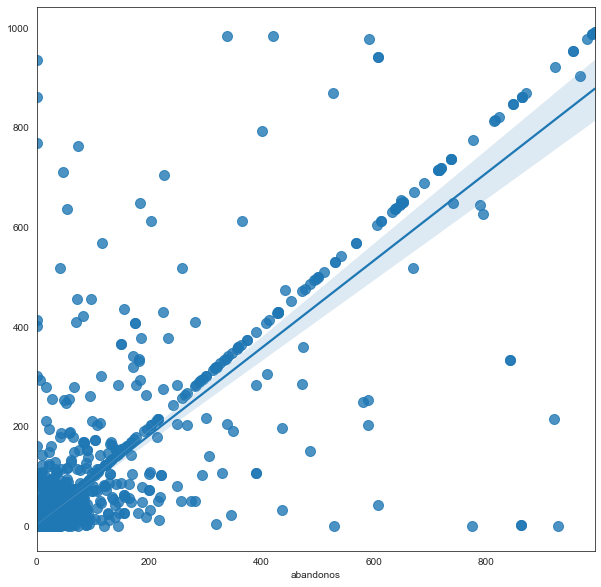

In [94]:

model=DecisionTreeRegressor()
model.fit(x_train, y_train)

expect_y=y_test
predict_y=model.predict(x_test)

r=metrics.r2_score(expect_y,predict_y)
print("Acurracy- Coefficient of determination (r²):",r)
#print();print('', metrics.mean_squared_log_error(expect_y, predict_y))

print("\nErro médio absoluto",mean_absolute_error(expect_y, predict_y))



#RMSE- Raiz do erro quadrático médio
MSE2 = mean_squared_error(expect_y,predict_y)


RMSE2 = mean_squared_error(expect_y,predict_y,squared=False) # argumento 'squared' dado como false nos da o RMSE
RMSE2 = MSE2**0.5
MAE2 = mean_absolute_error(expect_y,predict_y)


print("\nErro Quadrático Médio", MSE2)
print("\nErro Absoluto Médio: ",MAE2)
print("\nRaiz do erro quadrático médio:",RMSE2)


plt.figure(figsize=(10,10))
sns.regplot(expect_y, predict_y, scatter_kws={"s": 100} )
plt.show()

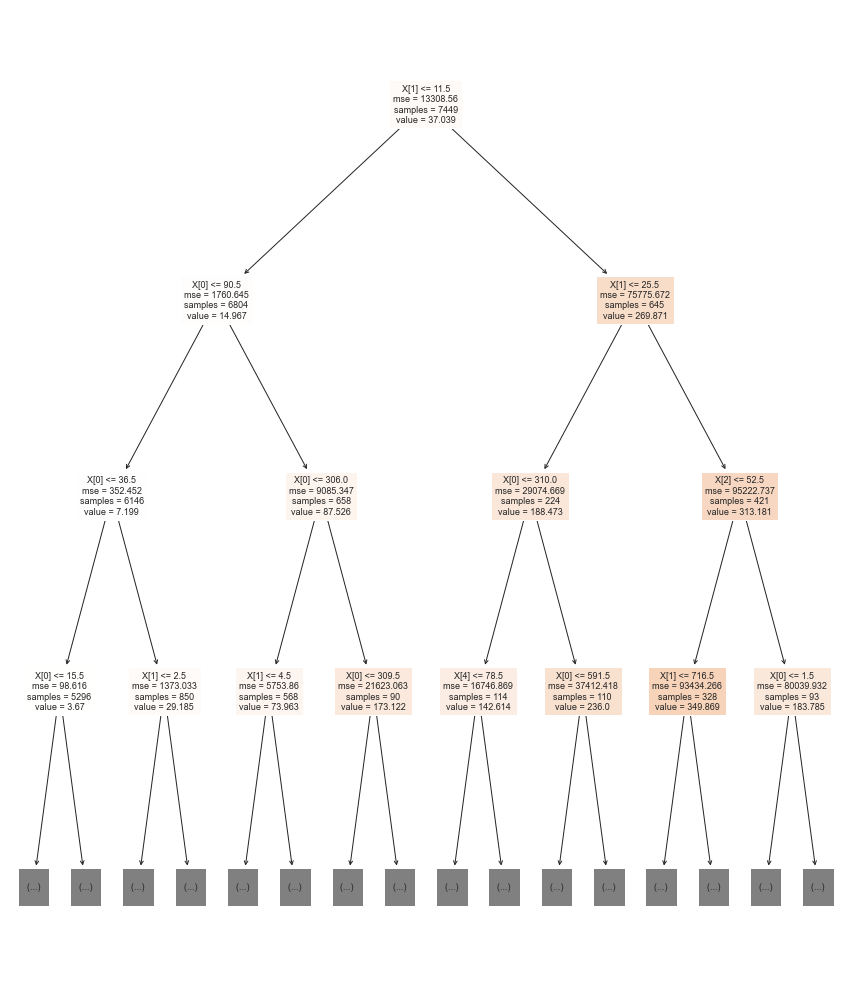

In [95]:
%matplotlib inline
plt.figure(figsize=(15,18))
tree.plot_tree(model,fontsize=9,filled=True,max_depth=3);

In [96]:
predictions = model.predict(x_test)
print(x_test)

       lendo  relendo  querem_ler  paginas  female
11156    107       10           1      128      98
1281       1        0          18       36      76
4318      12        0         152      304      44
724        0        0          53      100      66
10841      1        0          27      160      98
...      ...      ...         ...      ...     ...
6016     122        2           1      327      46
8684     174        4           1      320      51
8956      17        2         111     1495      34
632      106        4           3      256      88
2653       6        1          83      176      85

[3193 rows x 5 columns]


## Análise dos Modelos -- Regressão Linear X Regression tree

#### Comparações 

<ul> 
    <li> Erro Quadrático Médio: nada mais é um mecanismo que eleva ao quadrado o erro fornecido pelas previsões do modelo. 
        </li> 
    </ul> 

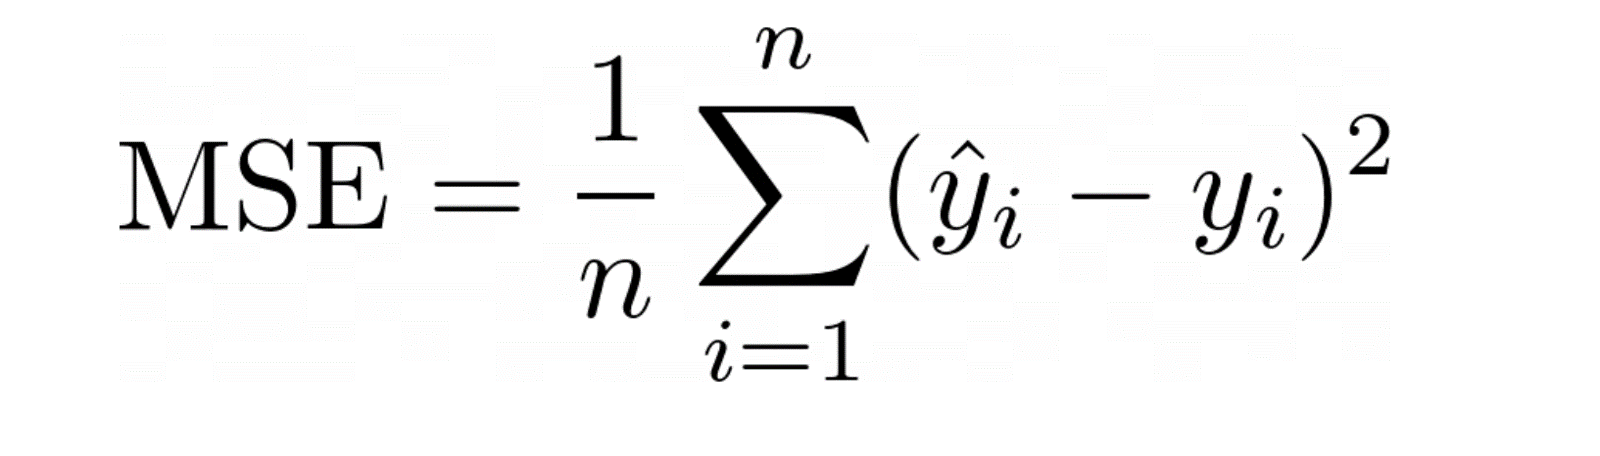

In [97]:
#comparações
print('-------------------------------------')
print('Erro Quadrático Médio')
print('Linear', MSE)
print("Árvore",  MSE2)
print('-------------------------------------')

-------------------------------------
Erro Quadrático Médio
Linear 11094.872483713969
Árvore 4897.867522705919
-------------------------------------


Como pode ser observado a regressão linear apresenta um erro quadrático médio maior que o da ávore de regressão, comprovando que é um modelo mais falho. 

<ul> 
    <li> Erro Absoluto Médio: Porcentagem obtida por intermédio da divisão entre a divisão da predição com o real </li> 
    </ul> 

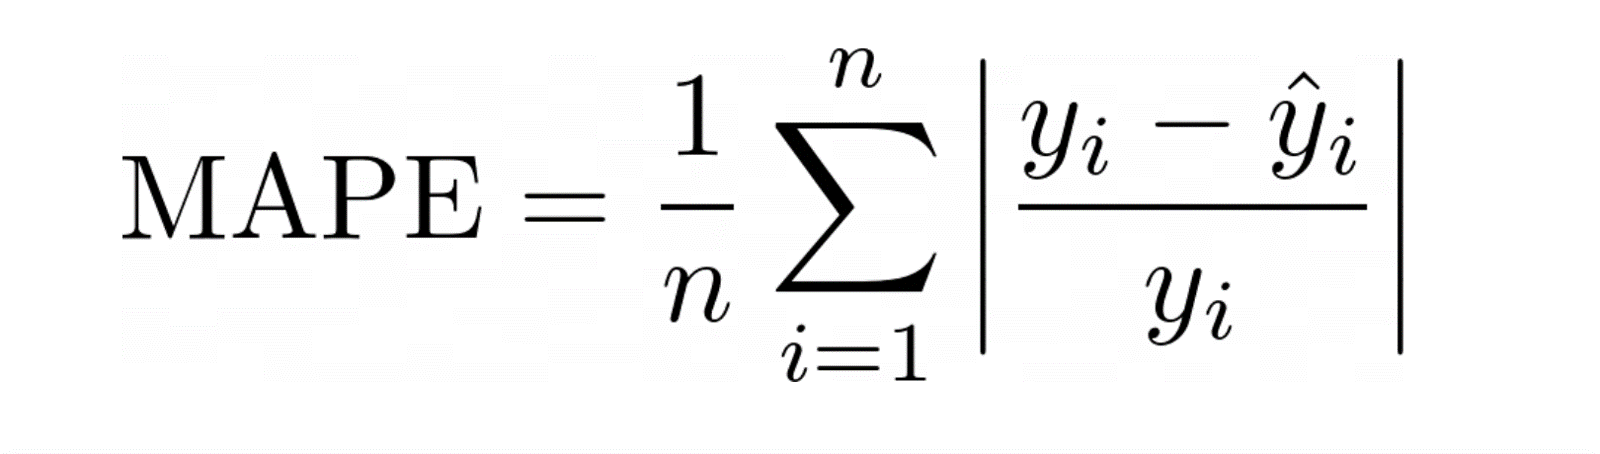

In [98]:
print('-------------------------------------')
print('Erro Absoluto Médio')
print('Linear', MAE)
print("Árvore",  MAE2)
print('-------------------------------------')

-------------------------------------
Erro Absoluto Médio
Linear 37.7644218542445
Árvore 18.320388349514563
-------------------------------------


<ul> 
    <li> Raiz do erro quadrático médio: É a medida de quão bem uma linha de regressão se ajusta aos dados reais</li> 
    </ul> 

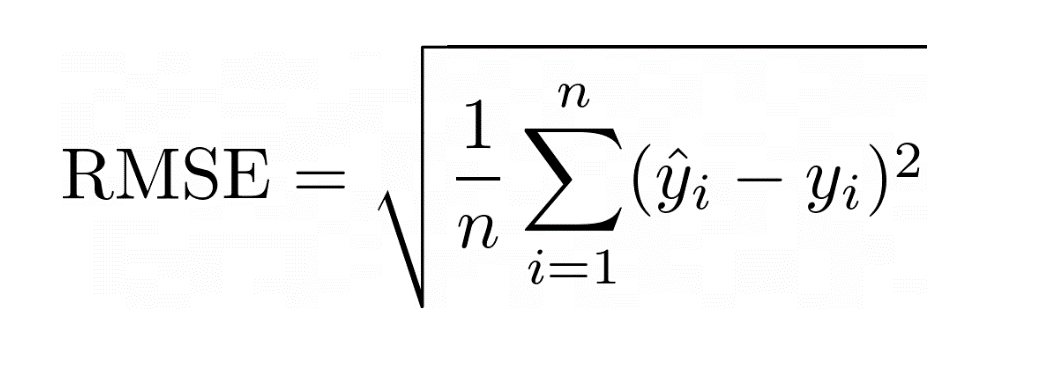

In [99]:
print('-------------------------------------')
print('\nRaiz do erro quadrático médio')
print('Linear', RMSE)
print("Árvore",  RMSE2)
print('-------------------------------------')

-------------------------------------

Raiz do erro quadrático médio
Linear 105.33220060225634
Árvore 69.98476636172988
-------------------------------------


**Quanto menor os valores apresentados nas métricas melhor é o modelo de predição**

As principais métricas apresentadas acima tem como função avaliar os modelos de predição, quando utilizadas para a comparação dos dois modelos aplicados (Regressão Linear e Regression Tree) pode-se perceber que a Árvore de Regressão é se mostra a principio mais efetivo para realizar previsões com base no nosso DataFrame.

## Conclusão

Uma vez apresentada a pergunta norteadora: *Como os fatores externos podem influenciar no abandono ou não de um livro?*
buscamos por meio desse projeto analisar as correspondências do dataFrame obtido e a partir delas estabelecer o melhor método de previsão para a nossa Target. Após análises e comparações, a árvore de regressão com aproximadamente 72% de acurácia mostrou-se melhor para a previsão do modelo, uma vez que como comprovado na comparação dos modelos, apresenta menores valores para as métricas de erros, enquanto o modelo da regressão liner detêm de uma acurácia de aproximadqamente 30% e valores altos para as métricas de erros. 

## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.feature_importances_ 

https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

https://pt.wikipedia.org/wiki/Thomas_Bulfinch

https://www.ibm.com/br-pt/analytics/learn/linear-regression

https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/#:~:text=As%20%C3%A1rvores%20de%20regress%C3%A3o%20s%C3%A3o,valor%20m%C3%A9dio%20das%20suas%20observa%C3%A7%C3%B5es.

https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96